In [1]:
import requests
from bs4 import BeautifulSoup
import csv

web = requests.get('https://www2.2019seagames.com/countries/')
data =BeautifulSoup(web.content, 'html.parser')

In [2]:
table = data.find_all('em')

In [3]:
country_temp = []
country = []

count = 0
for i in data.find_all('em'):
    if count % 6 == 0 and count != 0:
        country.append(country_temp)
        country_temp = []
        country_temp.append(i.text)
        count += 1
    else:
        country_temp.append(i.text)
        count += 1

country = country[0:11]

In [4]:
for i in range(len(country)):
    country[i][1] = country[i][1].replace('Total: ', '')
    country[i][2] = country[i][2].replace('Gold: ', '')
    country[i][3] = country[i][3].replace('Silver: ', '')
    country[i][4] = country[i][4].replace('Bronze: ', '')
    country[i][5] = country[i][5].replace('First Joined: ', '')

In [5]:
country[-2][-1] = '2003'

In [6]:
country[3][0] = 'LAO PDR'
country[0][0] = 'BRUNEI'

In [7]:
import numpy as np
import pandas as pd
sea_malaysia = pd.DataFrame(country, columns=['Country', 'Total Medal', 'Gold', 'Silver', 'Bronze', 'First Joined'])

In [8]:
sea_malaysia[['Total Medal', 'Gold', 'Silver', 'Bronze', 'First Joined']] = sea_malaysia[['Total Medal', 'Gold', 'Silver', 'Bronze', 'First Joined']].astype(int)

In [9]:
country_2019 = []
country_temp_2019 = []
count = 0

url_2 = requests.get('https://rs.2019seagames.com/RS2019/mobiapp/MedalTally')
data_2 = BeautifulSoup(url_2.content, 'html.parser')
for i in data_2.find_all('small'):
    if count % 5 == 0 and count != 0:
        country_2019.append(country_temp_2019)
        country_temp_2019 = []
        country_temp_2019.append(i.text)
        count += 1
    else:
        country_temp_2019.append(i.text)
        count += 1
        
country_2019 = country_2019[1:]
country_2019.append(['TIMOR LESTE', '0', '0', '0', '0'])
country_2019.sort()
country_2019

[['BRUNEI DARUSSALAM', '2', '5', '6', '13'],
 ['CAMBODIA', '4', '6', '36', '46'],
 ['INDONESIA', '72', '84', '111', '267'],
 ['LAO PDR', '1', '5', '29', '35'],
 ['MALAYSIA', '55', '58', '71', '184'],
 ['MYANMAR', '4', '18', '51', '73'],
 ['PHILIPPINES', '149', '117', '121', '387'],
 ['SINGAPORE', '53', '46', '68', '167'],
 ['THAILAND', '92', '103', '123', '318'],
 ['TIMOR LESTE', '0', '0', '0', '0'],
 ['VIETNAM', '98', '85', '105', '288']]

In [10]:
country_2019[0][0] = 'BRUNEI'

In [11]:
sea_filipina = pd.DataFrame(country_2019, columns=['Country','Gold', 'Silver', 'Bronze', 'Total Medal'])

In [12]:
sea_filipina[['Gold', 'Silver', 'Bronze', 'Total Medal']] = sea_filipina[['Gold', 'Silver', 'Bronze', 'Total Medal']].astype(int)

In [13]:
sea_filipina

,Country,Gold,Silver,Bronze,Total Medal
0,BRUNEI,2,5,6,13
1,CAMBODIA,4,6,36,46
2,INDONESIA,72,84,111,267
3,LAO PDR,1,5,29,35
4,MALAYSIA,55,58,71,184
5,MYANMAR,4,18,51,73
6,PHILIPPINES,149,117,121,387
7,SINGAPORE,53,46,68,167
8,THAILAND,92,103,123,318
9,TIMOR LESTE,0,0,0,0


## Jawaban No. 3

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

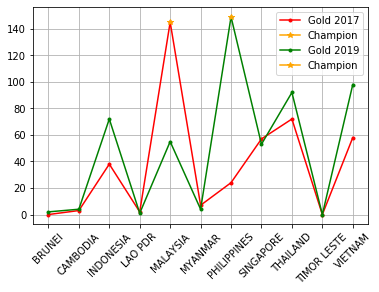

In [15]:
plt.plot(sea_malaysia.Country.tolist(), sea_malaysia.Gold.tolist(), 'r', label='Gold 2017', marker='.')
plt.plot(sea_malaysia.Country.tolist()[4], sea_malaysia.Gold.tolist()[4], marker='*', label='Champion', color='orange')
plt.plot(sea_filipina.Country.tolist(), sea_filipina.Gold.tolist(), 'green', label='Gold 2019', marker='.')
plt.plot(sea_filipina.Country.tolist()[6], sea_filipina.Gold.tolist()[6], marker='*', label='Champion', color='orange')
plt.legend()
plt.grid()
plt.xticks(rotation=45)

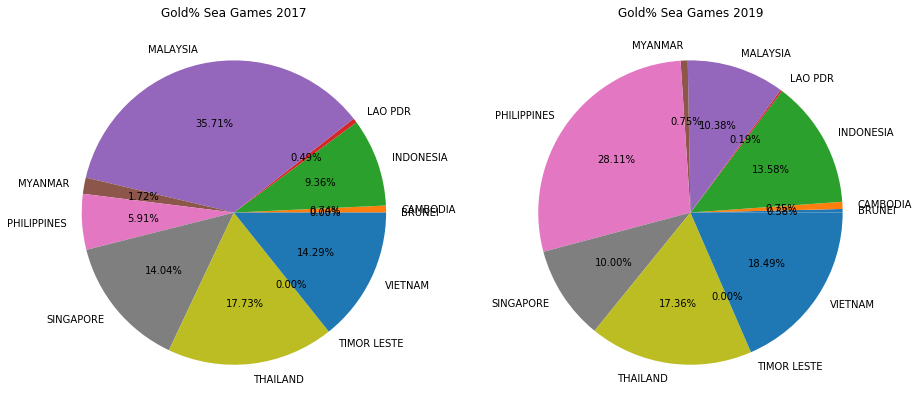

In [16]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.pie(sea_malaysia.Gold.tolist(), labels=sea_malaysia.Country.tolist(), autopct='%.2f%%')
plt.title('Gold% Sea Games 2017')

plt.subplot(122)
plt.pie(sea_filipina.Gold.tolist(), labels=sea_filipina.Country.tolist(), autopct='%.2f%%')
plt.title('Gold% Sea Games 2019')

plt.show()